
### Create a simple neural network to classify the Iris dataset

In [17]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [18]:
# Load the dataset
df=pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [19]:
# Load the dataset
iris_data = pd.read_csv('Iris.csv')

# Convert species to numerical values
iris_data['Species'] = iris_data['Species'].astype('category').cat.codes

# Split the data into features and labels
X = iris_data.drop('Species', axis=1).values
y = iris_data['Species'].values

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [20]:
# Build the model using an Input layer
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),  # Input layer specifying the shape
    layers.Dense(10, activation='relu'),  # Hidden layer with 10 neurons
    layers.Dense(3, activation='softmax')])  # Output layer with 3 neurons (one for each class)

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [21]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)


Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 236ms/step - accuracy: 0.3099 - loss: 1.0149 - val_accuracy: 0.5417 - val_loss: 0.9709
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3255 - loss: 1.0236 - val_accuracy: 0.5417 - val_loss: 0.9537
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.4036 - loss: 1.0203 - val_accuracy: 0.5833 - val_loss: 0.9366
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.4440 - loss: 0.9853 - val_accuracy: 0.6250 - val_loss: 0.9199
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.4779 - loss: 0.9950 - val_accuracy: 0.6250 - val_loss: 0.9038
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5391 - loss: 0.9139 - val_accuracy: 0.6250 - val_loss: 0.8879
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5365 - loss: 0.9176 - val_accuracy: 0.6250 - val_loss: 0.8722
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5560 - loss: 0.9261 - val_accuracy: 0.6250 - val_loss

In [22]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy:.4f}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 1.0000 - loss: 0.1646
Test Accuracy: 1.0000


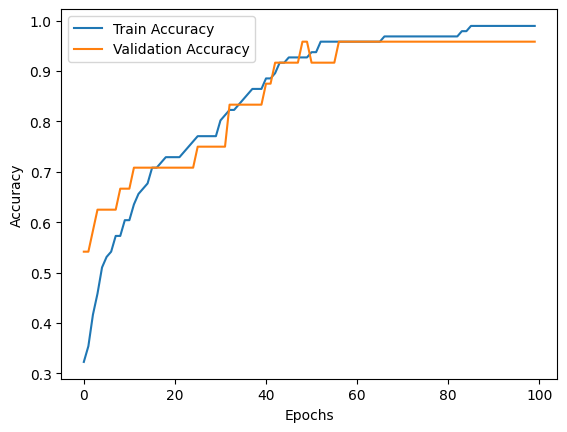

In [23]:
# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
